<a href="https://colab.research.google.com/github/ArMiarintsoa/poketrafinday-ispm-examen/blob/main/poketrafinday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation de dataset

Importation du dataset depuis une URL GitHub

In [48]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/ArMiarintsoa/poketrafinday-ispm-examen/refs/heads/main/train.csv"
test_url = "https://raw.githubusercontent.com/ArMiarintsoa/poketrafinday-ispm-examen/refs/heads/main/test.csv"
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

Affiche les 5 premières lignes du dataset pour vérifier la structure et le contenu

In [49]:
train_df.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0


In [52]:
total_NA_train = train_df.isna().sum()
total_NULL_train = train_df.isnull().sum()
total_NA_test = test_df.isna().sum()
total_NULL_test = test_df.isnull().sum()
print("\nTotal NAN train:\n",total_NA_train)
print("\nTotal NULL train:\n",total_NULL_train)
print("\nTotal NAN test:\n",total_NA_test)
print("\nTotal NULL test:\n", total_NULL_test)


Total NAN train:
 transaction_id    0
step              0
type              0
amount            0
customer_id       0
age               0
is_fraud          0
type_encoded      0
dtype: int64

Total NULL train:
 transaction_id    0
step              0
type              0
amount            0
customer_id       0
age               0
is_fraud          0
type_encoded      0
dtype: int64

Total NAN test:
 transaction_id    0
step              0
type              0
amount            0
customer_id       0
age               0
type_encoded      0
dtype: int64

Total NULL test:
 transaction_id    0
step              0
type              0
amount            0
customer_id       0
age               0
type_encoded      0
dtype: int64


Encoder le type

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
enc = le.fit_transform(train_df['type'])
train_df['type_encoded'] = enc
enc = le.fit_transform(test_df['type'])
test_df['type_encoded'] = enc
train_df.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud,type_encoded
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0,2
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0,2
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0,2
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0,3
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0,0


Encoder le customer_id

In [61]:
enc = le.fit_transform(train_df['customer_id'])
train_df['customer_id_encoded'] = enc
enc = le.fit_transform(test_df['customer_id'])
test_df['customer_id_encoded'] = enc
train_df.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud,type_encoded,customer_id_encoded
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0,2,1181
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0,2,28146
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0,2,7044
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0,3,26126
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0,0,7213


# EDA

Correlation entre les variables

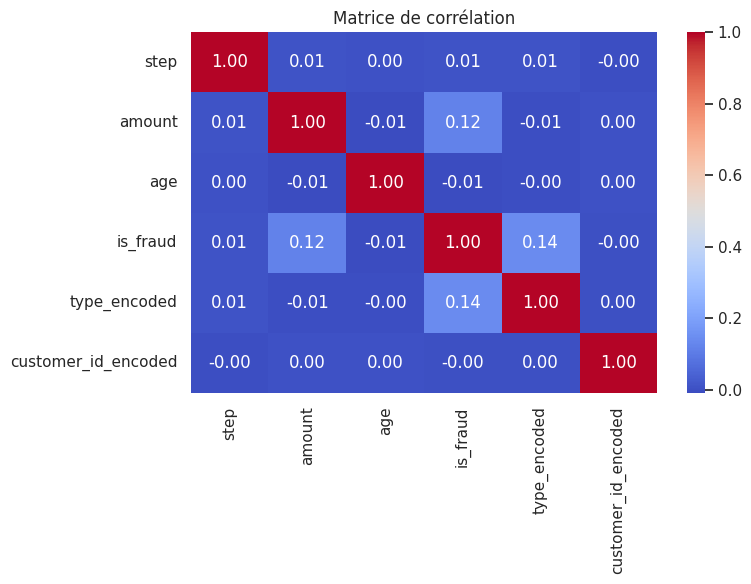

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
variables = ['step', 'amount',	'age',	'is_fraud',	'type_encoded', 'customer_id_encoded']

# Histogrammes
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

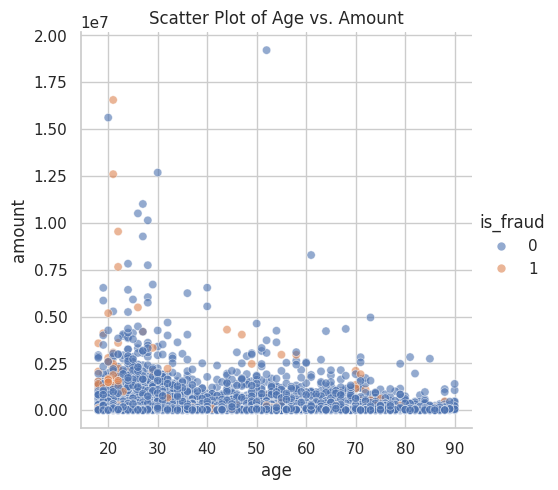

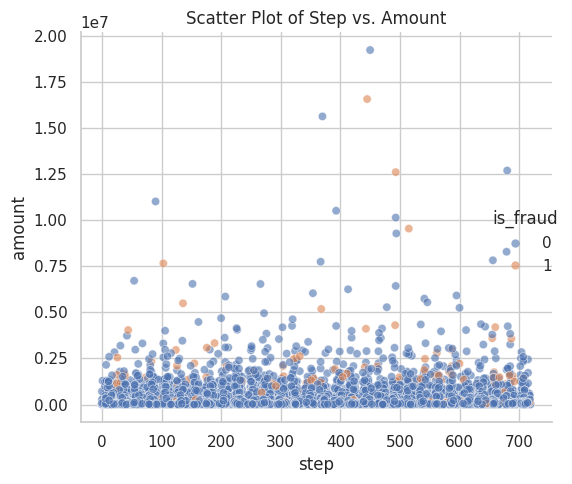

In [88]:
# Définir le style pour une meilleure lisibilité
sns.set_style("whitegrid")

# Création de la figure et des axes
plt.figure(figsize=(10, 6))

sns.relplot(x='age', y='amount', data=train_df, alpha=0.6, hue='is_fraud')
plt.title('Scatter Plot of Age vs. Amount')

sns.relplot(x='step', y='amount', data=train_df, alpha=0.6, hue='is_fraud')
plt.title('Scatter Plot of Step vs. Amount')

plt.tight_layout()
plt.show()